<a href="https://colab.research.google.com/github/JavZon/Course_WM/blob/main/Linear_Lasso_Ridge_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.4 MB/s eta 0:00:00
   ━

In [89]:
from pycaret.regression import *

Importing dataset

In [5]:
df = pd.read_csv('/content/train-data_car_price_pred.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
# As we have only few NaN values we drop them
# New_Price column have nearly 90% NaN values so we drop it too

df.drop(columns='New_Price', inplace=True)
df.dropna(inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage            5975 non-null   object 
 9   Engine             5975 non-null   object 
 10  Power              5975 non-null   object 
 11  Seats              5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 653.5+ KB


In [12]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [24]:
df.duplicated().sum()

0

In [13]:
df.sample(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5567,5567,Volkswagen Vento 2013-2015 1.6 Comfortline,Kolkata,2014,17000,Petrol,Manual,First,15.04 kmpl,1598 CC,103.2 bhp,5.0,NaN,4.25
713,713,Hyundai Xcent 1.2 Kappa SX Option,Kochi,2015,41721,Petrol,Manual,First,19.1 kmpl,1197 CC,82 bhp,5.0,NaN,4.70


Rename unnamed :0 to ID

In [7]:
df=df.rename(columns={'Unnamed: 0':'ID'})

In [95]:
df.sample(1)

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4021,4021,Mercedes-Benz New C-Class 200 Kompressor,Delhi,2011,62148,Petrol,Manual,First,11.7 kmpl,1796 CC,178 bhp,5.0,8.8


Name column

In [8]:
df['Name'].value_counts()

,count
Name,
Mahindra XUV500 W8 2WD,49
Maruti Swift VDI,45
Honda City 1.5 S MT,34
Maruti Swift Dzire VDI,34
Maruti Swift VDI BSIV,31
...,...
Ford Fiesta Titanium 1.5 TDCi,1
Mahindra Scorpio S10 AT 4WD,1
Hyundai i20 1.2 Era,1


As we have too many categorical values and this values can be accessed through ID column we drop this Name column

In [9]:
df.drop(columns='Name', inplace=True)

Location column

In [98]:
df['Location'].value_counts()

,count
Location,
Mumbai,784
Hyderabad,741
Kochi,648
Coimbatore,634
Pune,613
Delhi,549
Kolkata,530
Chennai,490
Jaipur,410


In [10]:
loc_dict={'Mumbai':1,'Hyderabad':2,'Kochi':3,'Coimbatore':4,'Pune':5,'Delhi':6,
          'Kolkata':7,'Chennai':8, 'Jaipur':9,'Bangalore':10,'Ahmedabad':11}

df['City']=df['Location'].map(loc_dict)
df.sample(5)

,ID,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City
2173,2173,Chennai,2012,55000,Diesel,Manual,First,15.0 kmpl,1896 CC,105 bhp,5.0,9.50,8
2250,2250,Hyderabad,2016,41713,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,2
5400,5400,Delhi,2014,69000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,5.45,6
5513,5513,Jaipur,2016,35000,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,3.00,9
278,278,Mumbai,2017,22695,Petrol,Manual,First,18.88 kmpl,999 CC,123.24 bhp,5.0,8.50,1


In [11]:
df.drop(columns='Location', inplace=True)

Fuel type

As there are only 4 values we use get_dummies to encode them

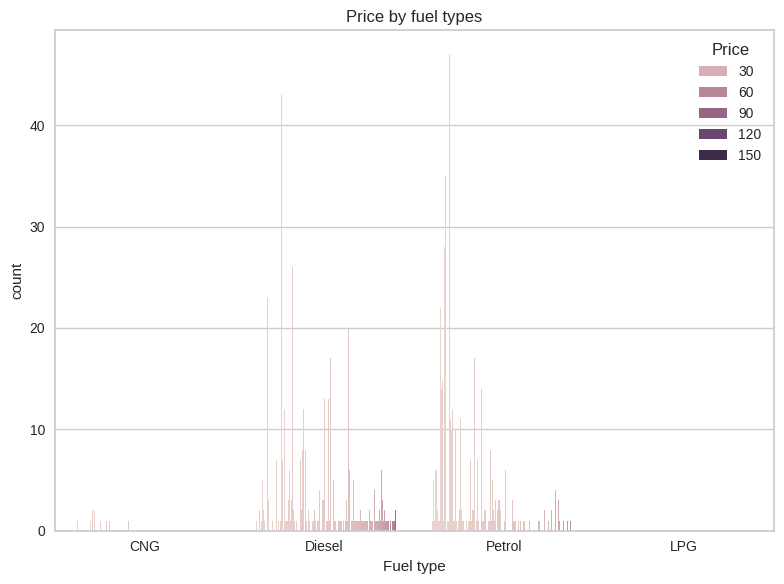

In [101]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Fuel_Type', hue='Price')
plt.title('Price by fuel types')
plt.xlabel('Fuel type')
plt.tight_layout()
plt.show()

In [12]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Diesel,3195
Petrol,2714
CNG,56
LPG,10


In [13]:
df=pd.get_dummies(df, columns=['Fuel_Type'],prefix=[''])

df.sample(5)

,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
338,338,2012,73000,Manual,First,21.12 kmpl,1248 CC,88.8 bhp,5.0,3.40,5,False,True,False,False
3229,3229,2015,42999,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,11.52,4,False,True,False,False
3286,3286,2012,79000,Manual,First,21.12 kmpl,1248 CC,88.8 bhp,5.0,2.59,9,False,True,False,False
3766,3766,2017,15000,Manual,First,18.88 kmpl,999 CC,123.24 bhp,5.0,8.00,1,False,False,False,True
649,649,2012,72450,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,8.10,6,False,True,False,False


In [14]:
cols=['_CNG','_Diesel','_LPG','_Petrol']
def type1(cols):
  for col in cols:
    df[col]=df[col].astype(int)
  return df

df=type1(cols)
df.sample(4)


,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
5641,5641,2012,45840,Automatic,First,11.4 kmpl,2953 CC,153.86 bhp,7.0,8.41,3,0,1,0,0
1746,1746,2015,34000,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.85,9,0,0,0,1
328,328,2008,42496,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,1.40,5,1,0,0,0
961,961,2014,37400,Manual,First,18.2 kmpl,1199 CC,82.5 bhp,5.0,1.89,7,0,0,0,1


In [15]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,4266
Automatic,1709


In [16]:
df['Transmission']=df['Transmission'].replace({'Manual':0, 'Automatic':1})

<ipython-input-16-859036a2f3a9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transmission']=df['Transmission'].replace({'Manual':0, 'Automatic':1})


In [17]:
df['Owner_Type'].value_counts()

,count
Owner_Type,
First,4903
Second,953
Third,111
Fourth & Above,8


In [18]:
df['Owner_Type']=df['Owner_Type'].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

<ipython-input-18-b31b04e16588>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Owner_Type']=df['Owner_Type'].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4})


In [19]:
df.sample(2)

,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
3841,3841,2018,5000,0,1,17.0 kmpl,1591 CC,121.3 bhp,5.0,8.70,7,0,0,0,1
5459,5459,2014,28000,1,1,13.0 kmpl,2987 CC,258 bhp,5.0,31.75,10,0,1,0,0


In [20]:
df.loc[2300,'Mileage']

'13.93 kmpl'

In [21]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '', regex=False)
df['Mileage'] = df['Mileage'].str.replace(' km/kg', '', regex=False)
df['Mileage'] = df['Mileage'].astype(float)
df.sample(3)

,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
2972,2972,2017,14000,0,1,18.60,1197 CC,81.83 bhp,5.0,5.95,1,0,0,0,1
300,300,2010,109000,0,2,12.99,2494 CC,100.6 bhp,7.0,8.26,2,0,1,0,0
3823,3823,2016,56628,0,1,20.40,1248 CC,92 bhp,5.0,5.85,3,0,1,0,0


In [22]:
df.loc[200,'Engine']

'1493 CC'

In [23]:
df['Engine']=df['Engine'].str.replace(' CC','',regex=False)
df['Engine']=df['Engine'].astype(float)
df.sample(3)

,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
4913,4913,2014,58000,0,2,24.4,1120.0,71 bhp,5.0,3.99,1,0,1,0,0
4439,4439,2015,72495,0,1,21.9,1396.0,88.76 bhp,5.0,7.00,2,0,1,0,0
5487,5487,2014,48000,0,1,23.1,998.0,67.04 bhp,5.0,3.25,6,0,0,0,1


In [24]:
df.loc[200,'Power']

'100 bhp'

In [25]:
df.sample(2)

,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
514,514,2013,64186,0,1,20.50,1598.0,103.5 bhp,5.0,3.76,5,0,1,0,0
5167,5167,2014,68000,0,2,16.02,1373.0,93.7 bhp,7.0,6.75,10,0,0,0,1


In [26]:
df.loc[200,'Power']

'100 bhp'

In [27]:
df['Power']=df['Power'].str.replace(' bhp','',regex=False)
df['Power'] = df['Power'].replace('null', np.nan)
df['Power']=pd.to_numeric(df['Power'], errors='coerce')
df.sample(3)

,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
1479,1479,2017,42527,0,1,20.4,1197.0,81.8,5.0,5.27,3,0,0,0,1
2306,2306,2010,45000,1,1,14.7,2993.0,241.4,6.0,40.00,2,0,1,0,0
1476,1476,2013,51000,1,1,23.8,1998.0,112.0,5.0,21.94,2,0,1,0,0


In [28]:
df.isnull().sum()

,0
ID,0
Year,0
Kilometers_Driven,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,103
Seats,0
Price,0


In [29]:
method=df['Power'].mean()
df['Power']=df['Power'].fillna(method)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5975 non-null   int64  
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Transmission       5975 non-null   int64  
 4   Owner_Type         5975 non-null   int64  
 5   Mileage            5975 non-null   float64
 6   Engine             5975 non-null   float64
 7   Power              5975 non-null   float64
 8   Seats              5975 non-null   float64
 9   Price              5975 non-null   float64
 10  City               5975 non-null   int64  
 11  _CNG               5975 non-null   int64  
 12  _Diesel            5975 non-null   int64  
 13  _LPG               5975 non-null   int64  
 14  _Petrol            5975 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 875.9 KB


In [31]:
df.head()

,ID,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,City,_CNG,_Diesel,_LPG,_Petrol
0,0,2010,72000,0,1,26.60,998.0,58.16,5.0,1.75,1,1,0,0,0
1,1,2015,41000,0,1,19.67,1582.0,126.20,5.0,12.50,5,0,1,0,0
2,2,2011,46000,0,1,18.20,1199.0,88.70,5.0,4.50,8,0,0,0,1
3,3,2012,87000,0,1,20.77,1248.0,88.76,7.0,6.00,8,0,1,0,0
4,4,2013,40670,1,2,15.20,1968.0,140.80,5.0,17.74,4,0,1,0,0


Auto **ML Pycaret**

In [126]:
pycaret_ml=setup(data=df,
              target='Price',
              session_id=123,
              normalize=True,
              transformation=True,
              transformation_method='quantile' )

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5975, 15)"
4,Transformed data shape,"(5975, 15)"
5,Transformed train set shape,"(4182, 15)"
6,Transformed test set shape,"(1793, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [127]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.6187,16.0876,3.8822,0.8808,0.1980,0.1896,0.7780
et,Extra Trees Regressor,1.6490,17.3193,4.0075,0.8719,0.1993,0.1903,1.1140
rf,Random Forest Regressor,1.7173,18.6813,4.1612,0.8619,0.2044,0.1948,2.0730
xgboost,Extreme Gradient Boosting,1.6377,19.9764,4.3319,0.8512,0.1981,0.1829,0.4760
gbr,Gradient Boosting Regressor,1.9138,19.4277,4.2828,0.8512,0.2286,0.2313,0.6700
knn,K Neighbors Regressor,2.5411,30.4528,5.4475,0.7673,0.2950,0.3022,0.2720
dt,Decision Tree Regressor,2.2905,32.9514,5.5716,0.7525,0.2723,0.2538,0.2670
ada,AdaBoost Regressor,5.1222,47.7629,6.8592,0.6211,0.6538,1.1759,0.6370
br,Bayesian Ridge,4.3923,50.8712,7.0703,0.6067,0.5355,0.8831,0.2920
lar,Least Angle Regression,4.3972,50.8755,7.0708,0.6066,0.5365,0.8854,0.2390


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [128]:
final_model=finalize_model(best_model)

In [129]:
y_pred=predict_model(final_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.0869,4.4702,2.1143,0.9644,0.1551,0.1532


According to Pycaret Auto ML the best model is **Light Gradient Boosting Machine**

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.preprocessing import StandardScaler

X=df.drop(columns='Price')
y=df['Price'].copy()
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_temp,y_train,y_temp=train_test_split(X,y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test=train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(4182, 14)
(4182,)
(896, 14)
(897, 14)
(896,)
(897,)


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

Linear Regression

In [136]:
linear=LinearRegression()

linear.fit(X_train, y_train)

y_linear_pred=linear.predict(X_val)

# MAE, MSE, R2
mae=mean_absolute_error(y_linear_pred,y_val)
mse=mean_squared_error(y_linear_pred,y_val)
r2=r2_score(y_linear_pred,y_val)

print('MAE :',mae)
print('MSE :',mse)
print('R2: ',r2)

MAE : 3.9334362987829556
MSE : 78.6856586319001
R2:  0.12130908229296866


Ridge

In [137]:
ridge=Ridge()

ridge.fit(X_train, y_train)

y_ridge_pred=ridge.predict(X_val)

# MAE, MSE, R2
mae=mean_absolute_error(y_ridge_pred,y_val)
mse=mean_squared_error(y_ridge_pred,y_val)
r2=r2_score(y_ridge_pred,y_val)

print('MAE :',mae)
print('MSE :',mse)
print('R2: ',r2)

MAE : 3.93040200828037
MSE : 78.76407312088404
R2:  0.12072708425149703


Lasso

In [138]:
lasso=Lasso()

lasso.fit(X_train, y_train)

y_lasso_pred=lasso.predict(X_val)

# MAE, MSE, R2
mae=mean_absolute_error(y_lasso_pred,y_val)
mse=mean_squared_error(y_lasso_pred,y_val)
r2=r2_score(y_lasso_pred,y_val)

print('MAE :',mae)
print('MSE :',mse)
print('R2: ',r2)

MAE : 3.6279529540432307
MSE : 60.64594538871211
R2:  -0.05374935214829901


Hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

# define models
ridge=Ridge()
lasso=Lasso()
elastic=ElasticNet()

# assign param_grids
param_grid1={'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}
param_grid2={'alpha':[0.0001,0.001,0.01,0.1,1,10,100],
             'l1_ratio':[0.1,0.5,0.9]}

# creating grid_search for each model
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid1, cv=5)
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid1, cv=5)
grid_search_elastic = GridSearchCV(estimator=elastic, param_grid=param_grid2, cv=5)

# fitting models
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)
grid_search_elastic.fit(X_train, y_train)

# getting best params and scores

# ridge
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_
print("Best Parameters for Ridge:", best_params_ridge)
print("Best Cross-Validation Score for Ridge:", best_score_ridge)

#lasso
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_
print("Best Parameters for Lasso:", best_params_lasso)
print("Best Cross-Validation Score for Lasso:", best_score_lasso)

# elastic
best_params_elastic = grid_search_elastic.best_params_
best_score_elastic = grid_search_elastic.best_score_
print("Best Parameters for ElasticNet:", best_params_elastic)
print("Best Cross-Validation Score for ElasticNet:", best_score_elastic)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.320e+04, tolerance: 3.909e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+04, tolerance: 3.589e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.050e+04, tolerance: 3.814e

Best Parameters for Ridge: {'alpha': 10}
Best Cross-Validation Score for Ridge: 0.7148885296191054
Best Parameters for Lasso: {'alpha': 0.01}
Best Cross-Validation Score for Lasso: 0.7149386193504433
Best Parameters for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}
Best Cross-Validation Score for ElasticNet: 0.7149424733022781


In [37]:
ridge=Ridge(alpha=10)

ridge.fit(X_train, y_train)

y_pred=ridge.predict(X_test)

mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print('MAE :',mae)
print('MSE :',mse)
print('R2: ',r2)

MAE : 3.8793310110527104
MSE : 46.595162338351436
R2:  0.4646306211035093


In [38]:
!pip install lightgbm

In [39]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [41]:
lgb_model=lgb.LGBMRegressor()

lgb_model.fit(X_train, y_train)

y_pred=lgb_model.predict(X_val)

mae=mean_absolute_error(y_pred,y_val)
mse=mean_squared_error(y_pred,y_val)
r2=r2_score(y_pred,y_val)

print('MAE :',mae)
print('MSE :',mse)
print('R2: ',r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 4182, number of used features: 13
[LightGBM] [Info] Start training from score 9.428144
MAE : 1.6301794251095953
MSE : 21.765319370166335
R2:  0.7890478524934135


In [42]:
from sklearn.model_selection import RandomizedSearchCV
model = lgb.LGBMRegressor()

# parameter grid for RandomizedSearchCV
param_dist = {
    'num_leaves': np.arange(10, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': np.arange(5, 20),
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'min_child_samples': np.arange(5, 30)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=1)

# Fit random search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", random_search.best_score_)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 4182, number of used features: 14
[LightGBM] [Info] Start training from score 9.428144
Best Parameters: {'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 7, 'learning_rate': 0.2, 'boosting_type': 'gbdt'}
Best Cross-Validation Score: 0.9058646019444471
Test Score: 0.9007853983989458


In [43]:
{'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 7, 'learning_rate': 0.2, 'boosting_type': 'gbdt'}

lgb_model=lgb.LGBMRegressor(num_leaves=15, n_estimators=200, min_child_samples=5,
                            max_depth=7, learning_rate=0.2, boosting_type ='gbdt')

lgb_model.fit(X_train, y_train)

y_pred=lgb_model.predict(X_test)

mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print('MAE :',mae)
print('MSE :',mse)
print('R2: ',r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 4182, number of used features: 14
[LightGBM] [Info] Start training from score 9.428144
MAE : 1.5871203251255874
MSE : 15.688867248369409
R2:  0.8813364153688333
